# Greyscale calibration 

This script is able to extract the data from the 16x8 matrix of greyscale values to for calibration of GS contrast curves using the Polytec MSA-500 topography measurement.

1. A `gs_calirbationv20240125.dxf` calibration mask was produced using the `klayout.ipynb` script.
2. This mask is exposed for different `Energy` and `Focus` conditions on the wafer
3. The PR is then developed and the wafer is characterized under the Polytec MSA-500 topography measurements. Check the conditions below to achieve a proper measuremnet of the polytec.
4. Then use the extracted `TMS_E90_F40_matrix.txt` file to process using this script


## Polytec measurement conditions


1. Place the sample under the 10x topography microscope objective as flat as possible
2. Adjust the focus so the fringes are starting on the surface of the measurement plane (top of photoresist)
3. Adjust the start and stop measurement range of the polytec in the software

### Under the Polytec preconditions:
- Filter settings:
    - S-filter: check
        - cut off wavelength x and y both at 10µm
    - Erosion: check
        - width: 11
        - height: 11
        - rectangular: check
        - clip: check
    - Median filter:
        - width: 21
        - height: 21
        - fill: check
        - rectangular: check
- TMS measurement settings:
    - Threshold: 10
    - number of correlograms: 1
    - vibration compensation: check




### After measurement, save the data

1. select two flat regions and create masks
2. right click outside the masks and select masks
3. Process -> linear regression
4. Right click outisde masks and unselect masks
5. File -> Save ascii data
    1. Save Z-values, Matrix
    2. Store as text file

6. Run script

## Script:

1. Load the `file = "TMS_E90_F40_matrix.txt"`
2. Adjust the `region_origin = ( x0, y0)` values to match the square of the greylevel 0
3. Adjust the `region_tilt_angle = 0` in degrees in case the data is tilted so that the dots are placed near the center of each square
4. Confirm the location of the measurement positions, and set the `export_data = True` flag so that the image files and `.csv` output calibration files are exported.






In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd


from scipy import interpolate
import os

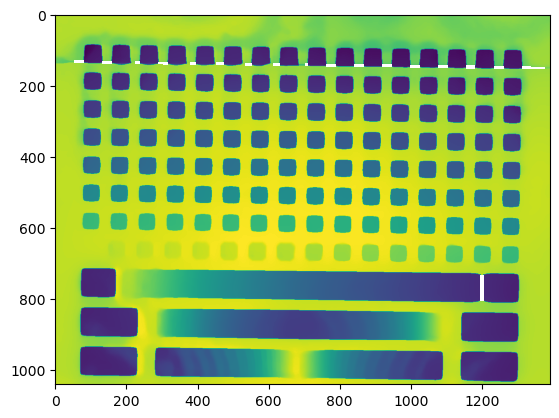

In [30]:

path = "\\\\inl-fps01\\Data\\CleanRoom\\UsersData\\29_ImiNa\\SensitiveIndustry\\SensInd_Test05_NIL_GS_Replication\\Metrology\\4. Polytec\\Test01W02"

file = "TMS_E100_F40_matrix.txt"
file = "TMS_E100_F-40_matrix.txt"
file = "TMS_E100_F0_matrix.txt"
file = "TMS_E90_F40_matrix.txt"

file = "TMS_E90_F0.txt"

file = "TMS_E100_F0.txt"
file = "TMS_E100_F40.txt"

filename = os.path.join(path, file)

# Read matrix data
data = np.genfromtxt(filename,delimiter='\t')

# Convert to µm topography
data *= 1000
plt.imshow(data)




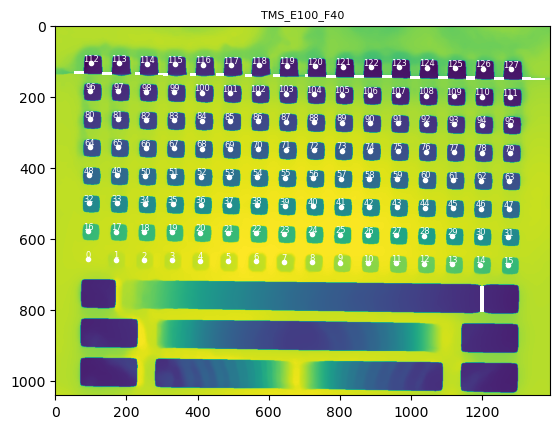

In [36]:
# Create the regions vector

# Adjust the region_origin position and tilt angle on the image, 
# then set the export_data flag to True


region_origin = (95, 775)
region_origin = (101, 655)


export_data = True
export_data = False

region_tilt_angle = 0.8

region_width = 15
region_height = region_width
region_cols = 16
region_rows = 8
region_step_x = 78.5
region_step_x = 78.8
region_step_y = region_step_x

regions = []

region_x = []
region_y = []

indexes = range(region_cols*region_rows)

plt.imshow(data)
for ri in range(region_rows):
    for ci in range(region_cols):
        # index = ci*region_rows+ri
        index = ri*region_cols+ci

        
        # print(index, ci, ri)
        # regions[index] =(np.where(xx)) 
        x = region_origin[0]+ci*region_step_x
        y = region_origin[1]-ri*region_step_y

        x1 = x*np.cos(np.radians(region_tilt_angle)) - y*np.sin(np.radians(region_tilt_angle))
        y1 = x*np.sin(np.radians(region_tilt_angle)) + y*np.cos(np.radians(region_tilt_angle))

        x,y = x1,y1
        plt.plot(x,y, 'w.')
        plt.text(x,y, index, fontsize=6, va='bottom', ha='center', c='w')

        region_x.append(x)
        region_y.append(y)

# print(region_x, region_y)


file_text = os.path.splitext(file)[0]


plt.title(file_text, fontsize=8)


if export_data:
    test_filename = file_text+"_measurement.png"
    plt.savefig(os.path.join(path, test_filename))



0 91.84492680279958 656.346333440348
1 170.63724569473277 657.4465532510726
2 249.42956458666595 658.5467730617972
3 328.22188347859907 659.6469928725219
4 407.01420237053225 660.7472126832465
5 485.8065212624654 661.8474324939712
6 564.5988401543987 662.9476523046958
7 643.3911590463318 664.0478721154204
8 722.183477938265 665.1480919261451
9 800.9757968301981 666.2483117368697
10 879.7681157221314 667.3485315475943
11 958.5604346140644 668.448751358319
12 1037.3527535059975 669.5489711690436
13 1116.1450723979306 670.6491909797683
14 1194.937391289864 671.749410790493
15 1273.7297101817971 672.8496306012177
16 92.94514661352423 577.5540145484149
17 171.7374655054574 578.6542343591395
18 250.5297843973906 579.7544541698642
19 329.3221032893237 580.8546739805888
20 408.1144221812569 581.9548937913135
21 486.90674107319006 583.0551136020381
22 565.6990599651233 584.1553334127627
23 644.4913788570565 585.2555532234874
24 723.2836977489897 586.355773034212
25 802.0760166409227 587.4559928

C:\Users\daguiam264\AppData\Local\Temp\ipykernel_36616\3641416477.py:36: RuntimeWarning: overflow encountered in exp
  m = np.exp(-C*x)
C:\Users\daguiam264\AppData\Local\Temp\ipykernel_36616\3641416477.py:38: RuntimeWarning: overflow encountered in power
  return np.exp(e1+e2*m+e3*np.power(m,2)) + e4*x
C:\Users\daguiam264\AppData\Local\Temp\ipykernel_36616\3641416477.py:38: RuntimeWarning: overflow encountered in multiply
  return np.exp(e1+e2*m+e3*np.power(m,2)) + e4*x
C:\Users\daguiam264\AppData\Local\Temp\ipykernel_36616\3641416477.py:38: RuntimeWarning: invalid value encountered in add
  return np.exp(e1+e2*m+e3*np.power(m,2)) + e4*x
C:\Users\daguiam264\AppData\Local\Temp\ipykernel_36616\3641416477.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(e1+e2*m+e3*np.power(m,2)) + e4*x


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

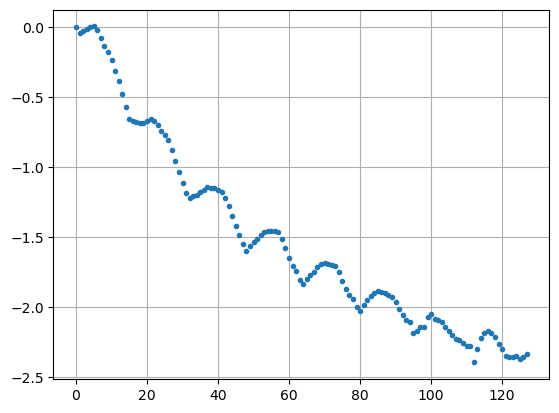

In [43]:


depths = []
depths_std = []
for index, (x,y) in enumerate(zip(region_x, region_y)):
    # print(index, x,y)

    # print(index, x, y)
    region_data = data[int(y-region_height/2):int(y+region_height/2),
                       int(x-region_width/2):int(x+region_width/2)]
    
    region_mean = np.nanmean(region_data)
    region_std = np.nanstd(region_data)
    # print(int(x-region_width/2),int(x+region_width/2))
    # print(int(y-region_height/2),int(y+region_height/2))
    # print(data[int(x-region_width/2):int(x+region_width/2)][int(y-region_height/2):int(y+region_height/2)])
    # print(index,x,y,value, data.shape, region_data.shape)
    depths.append(region_mean)
    depths_std.append(region_std)



depths = np.array(depths)
depths_std = np.array(depths_std)

# normalize so the first value is 0
depths -= depths[0]



plt.figure()
plt.plot(indexes, depths, '.')

plt.grid(which='both')

# depths = depths-depths[-1]
def gs_fit_curve(x, e1, e2 ,e3, e4, C,):
    m = np.exp(-C*x)

    return np.exp(e1+e2*m+e3*np.power(m,2)) + e4*x 


from scipy.optimize import curve_fit


depths -= depths[-1]

popt, pcov = curve_fit(gs_fit_curve, indexes, depths)

fit_depth = gs_fit_curve(indexes, *popt)
depths -= depths[0]
fit_depth -= fit_depth[0]
# print(popt)
# plt.plot(indexes, depths)
plt.plot(indexes, fit_depth,)
fit_depth[-1]


# plt.plot(indexes,depths_std)
plt.errorbar(indexes,depths, yerr=depths_std*2)

plt.xlabel("Grey level")
plt.ylabel("Depth [µm]")


plt.title(file_text, fontsize=8)

if export_data:

    test_filename = file_text+"_raw_data.png"
    plt.savefig(os.path.join(path, test_filename))

    raw_filename = file_text+"_raw_data.csv"

    np.savetxt(os.path.join(path, raw_filename), 
            np.array([indexes, depths, depths_std, fit_depth]).T, 
            delimiter=',',
            fmt=['%d', '%0.3f', '%0.3f', '%0.3f'],
            header='greylevel, depth, depth_std, fit_depth')


    raw_filename = file_text+"_gs_calibration.csv"

    np.savetxt(os.path.join(path, raw_filename), 
            np.array([indexes, fit_depth]).T, 
            delimiter=',',
            fmt=['%d', '%0.3f'],
            header='greylevel, depth')


